Import of all relevant libraries:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import of Stack Overflow 2015 survey data:

In [9]:
df_2015 = pd.read_csv('2015 Stack Overflow Developer Survey Responses.csv', header=1)

C:\Users\lisa1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Analysis of the columns having a mixed data format:

In [10]:
df_2015.iloc[:, [5,108,121,196,197,198]]

,Occupation,Industry,Most important aspect of new job opportunity: Company stage,Source control used: TFS,Source control used: DCVS,Source control used: Bitkeeper
0,Back-end web developer,Aerospace,NaN,NaN,NaN,NaN
1,Back-end web developer,Aerospace,NaN,TFS,NaN,NaN
2,Back-end web developer,Aerospace,NaN,NaN,NaN,NaN
3,Back-end web developer,Aerospace,NaN,NaN,NaN,NaN
4,Back-end web developer,Aerospace,NaN,TFS,NaN,NaN
...,...,...,...,...,...,...
26081,NaN,NaN,NaN,NaN,NaN,NaN
26082,NaN,NaN,NaN,NaN,NaN,NaN
26083,NaN,NaN,NaN,NaN,NaN,NaN
26084,NaN,NaN,NaN,NaN,NaN,NaN


Among the columns having mixed type the only column that will be used for the analysis is occupation, which will be formatted as string:

In [11]:
df_2015['Occupation'] = df_2015['Occupation'].astype('str')

Import of Stack Overflow 2020 survey data:

In [13]:
df_2020 = pd.read_csv('survey_results_public_2020.csv', header=0)
df_2020.shape

(64461, 61)

Count and visual representation of the geographical distribution of the respondents in 2015:

In [15]:
df_coun_2015 = pd.DataFrame(df_2015.Country.dropna().value_counts() /df_2015.Country.dropna().shape)
df_coun_2015.reset_index(inplace = True)
df_coun_2015.rename(columns={'index': 'Country', 'Country': 'Count'}, inplace = True)

#for simplification purposes the countries having a percentage below 2% are aggregated as 'Other'
df_coun_2015['Country_new'] = np.where((df_coun_2015['Count'] < 0.02) | (df_coun_2015['Count'].isna()), 'Other',df_coun_2015['Country'])
df_coun_2015 = pd.DataFrame(df_coun_2015.groupby('Country_new')['Count'].sum().reset_index()).sort_values(by=['Count'], ascending=False)

df_coun_2015.head(10)


,Country_new,Count
7,Other,0.305550
13,United States,0.187705
4,India,0.097354
12,United Kingdom,0.095059
3,Germany,0.078168
8,Poland,0.032952
1,Canada,0.032754
2,France,0.030697
9,Russian Federation,0.025713
0,Australia,0.024447


C:\Users\lisa1\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


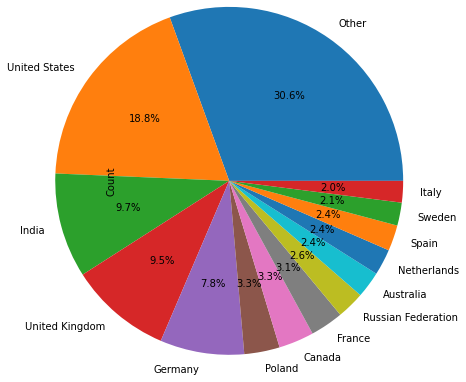

In [16]:
df_coun_2015.plot.pie(y='Count', labels=df_coun_2015['Country_new'], legend = False, autopct='%1.1f%%', radius = 2)
plt.show()

Count and visual representation of the geographical distribution of the respondents in 2020:

In [17]:
df_coun_2020 = pd.DataFrame(df_2020.Country.dropna().value_counts() / df_2020.Country.dropna().shape)
df_coun_2020.reset_index(inplace = True)

#for simplification purposes the countries having a percentage below 2% are aggregated as 'Other'
df_coun_2020.rename(columns={'index': 'Country', 'Country': 'Count'}, inplace = True)
df_coun_2020['Country_new'] = np.where((df_coun_2020['Count'] < 0.02) | (df_coun_2020['Count'].isna()), 'Other',df_coun_2020['Country'])
df_coun_2020 = pd.DataFrame(df_coun_2020.groupby('Country_new')['Count'].sum().reset_index()).sort_values(by=['Count'], ascending=False)

df_coun_2020.head(10)

,Country_new,Count
6,Other,0.439568
8,United States,0.194609
4,India,0.131149
7,United Kingdom,0.060807
3,Germany,0.060713
1,Canada,0.034196
2,France,0.029623
0,Brazil,0.028374
5,Netherlands,0.020961


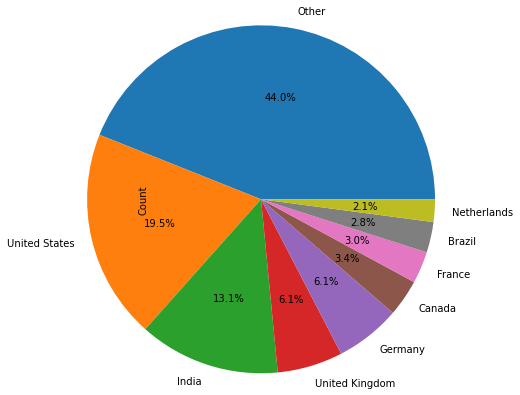

In [91]:
df_coun_2020.plot.pie(y='Count', labels=df_coun_2020['Country_new'], legend = False, autopct='%1.1f%%', radius = 2)
plt.show()

Count and visual representation of the gender distribution of the respondents in 2015:

C:\Users\lisa1\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


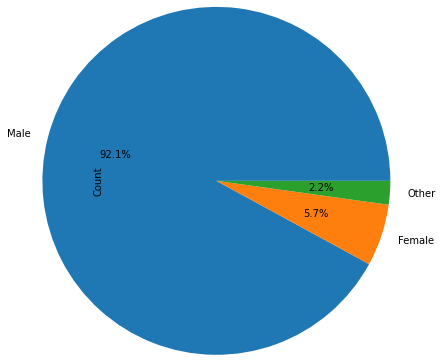

In [18]:
df_gen_2015 = pd.DataFrame(df_2015.Gender.dropna().value_counts() /df_2015.Gender.dropna().shape)
df_gen_2015.reset_index(inplace = True)
df_gen_2015.rename(columns={'index': 'Gender', 'Gender': 'Count'}, inplace = True)

#for simplification purposes all non-binary genders are aggregated as 'Other'
df_gen_2015['Gender_agg'] = np.where((~df_gen_2015['Gender'].isin(('Male','Female'))) | (df_gen_2015['Count'].isna()), 'Other',df_gen_2015['Gender'])
df_gen_2015 = pd.DataFrame(df_gen_2015.groupby('Gender_agg')['Count'].sum().reset_index()).sort_values(by=['Count'], ascending=False)

df_gen_2015.plot.pie(y='Count', labels=df_gen_2015['Gender_agg'], legend = False, autopct='%1.1f%%', radius = 2)
plt.show()

Count and visual representation of the gender distribution of the respondents in 2020:

In [19]:
df_gen_2020 = pd.DataFrame(df_2020.Gender.dropna().value_counts() /df_2020.Gender.dropna().shape)
df_gen_2020.reset_index(inplace = True)
df_gen_2020.rename(columns={'index': 'Gender', 'Gender': 'Count'}, inplace = True)
df_gen_2020['Gender_agg'] = np.where((~df_gen_2020['Gender'].isin(('Man','Woman'))) | (df_gen_2020['Count'].isna()), 'Other',df_gen_2020['Gender'])
df_gen_2020 = pd.DataFrame(df_gen_2020.groupby('Gender_agg')['Count'].sum().reset_index()).sort_values(by=['Count'], ascending=False)

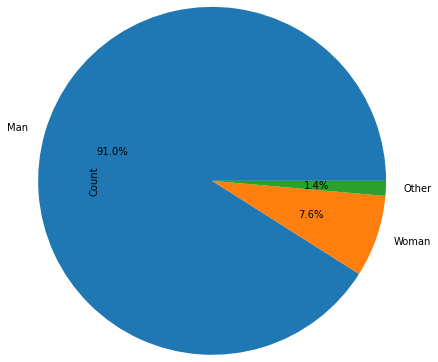

In [20]:
df_gen_2020.plot.pie(y='Count', labels=df_gen_2020['Gender_agg'], legend = False, autopct='%1.1f%%', radius = 2)
plt.show()

Count and visual representation of the most common programming languages in 2015:

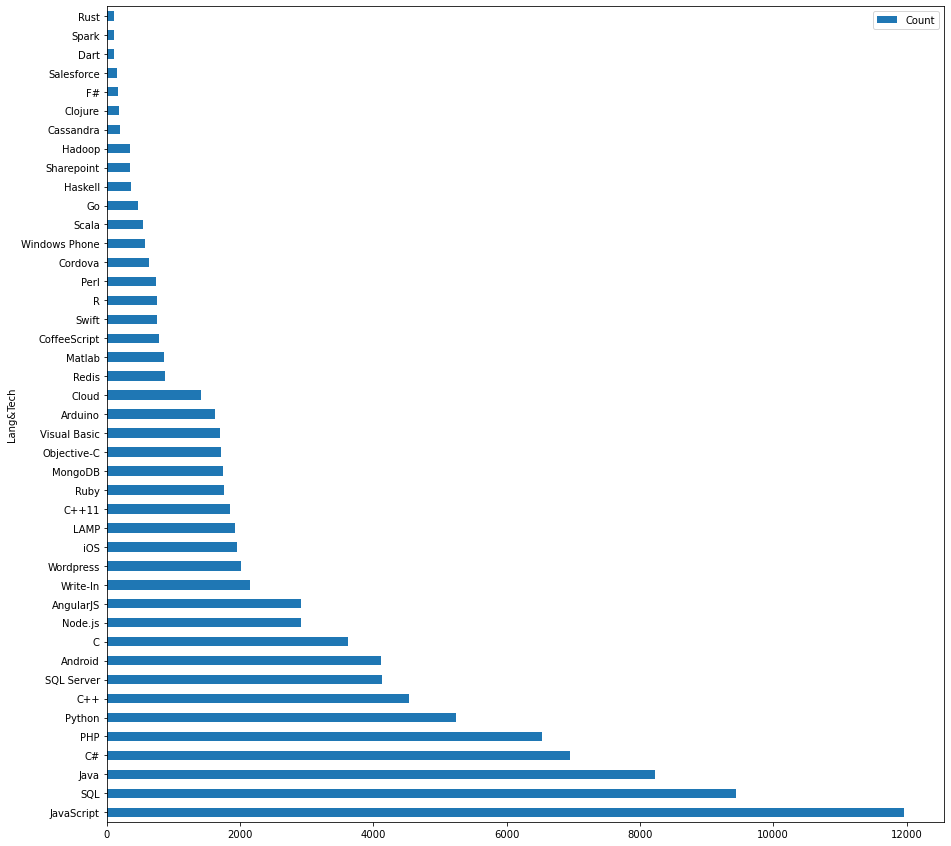

In [21]:
df_lan_2015 = pd.DataFrame(df_2015.filter(like='Current Lang & Tech', axis=1).count().rename('Count').reset_index()).sort_values(by=['Count'], ascending=False)
df_lan_2015.rename(columns={'index': 'Lang&Tech'}, inplace = True)
df_lan_2015['Lang&Tech'] = df_lan_2015['Lang&Tech'].str.replace(r'Current Lang & Tech: ','')

df_lan_2015.plot.barh(x='Lang&Tech',figsize=(15,15))
plt.show()

Count and visual representation of the programming languages that respondents in 2015 intended to learn in the future:

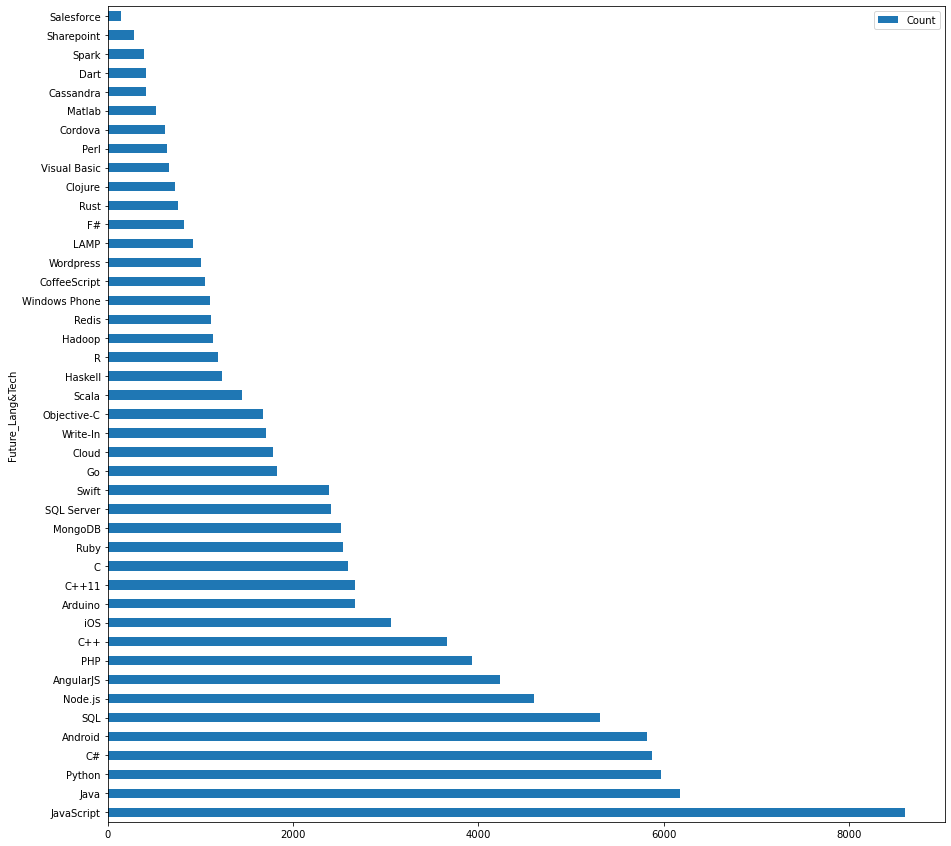

In [20]:
df_lan_2015 = pd.DataFrame(df_2015.filter(like='Future Lang & Tech', axis=1).count().rename('Count').reset_index()).sort_values(by=['Count'], ascending=False)
df_lan_2015.rename(columns={'index': 'Future_Lang&Tech'}, inplace = True)
df_lan_2015['Future_Lang&Tech'] = df_lan_2015['Future_Lang&Tech'].str.replace(r'Future Lang & Tech: ','')

df_lan_2015.plot.barh(x='Future_Lang&Tech',figsize=(15,15))
plt.show()

Count and visual representation of the most common programming languages in 2020:

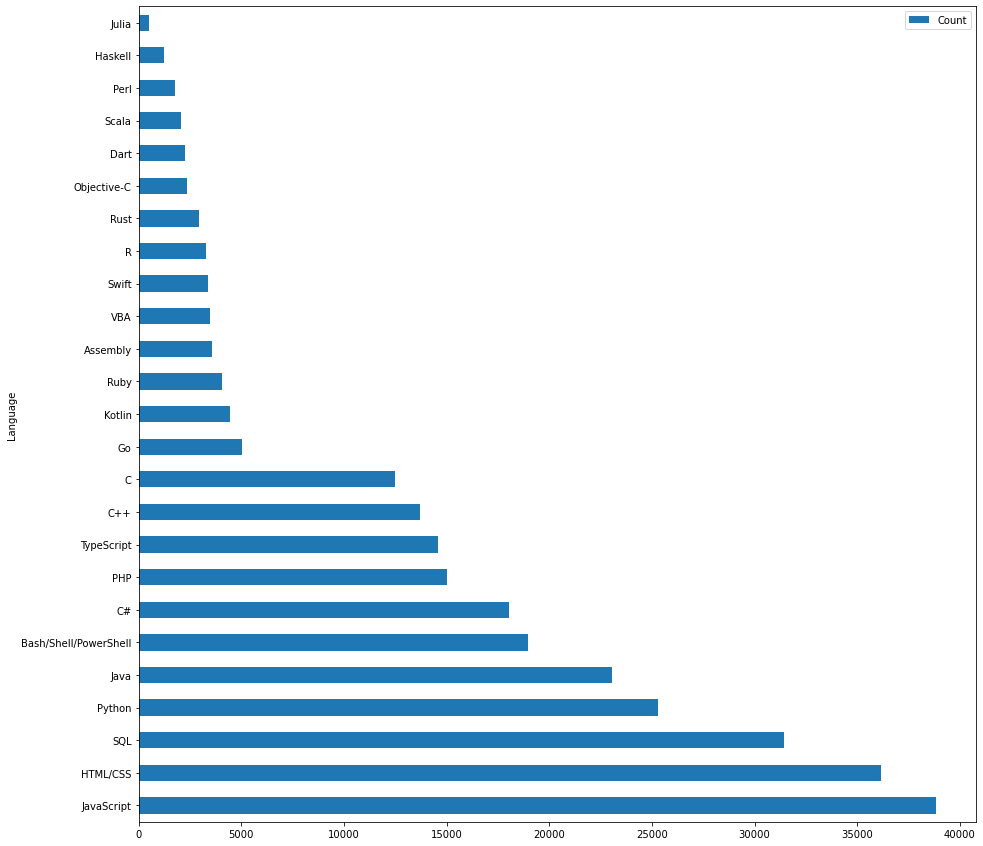

In [23]:
df_lan_2020 = df_2020[['LanguageWorkedWith']].dropna()
df_lan_2020 = pd.DataFrame(df_lan_2020.LanguageWorkedWith.str.split(';').explode('LanguageWorkedWith').reset_index(drop=True))
df_lan_2020 = pd.DataFrame(df_lan_2020['LanguageWorkedWith'].value_counts().rename('Count').reset_index())
df_lan_2020.rename(columns={'index': 'Language'}, inplace = True)

df_lan_2020.plot.barh(x='Language',figsize=(15,15))
plt.show()

Count and visual representation of the programming languages that respondents in 2020 intended to learn in the future:

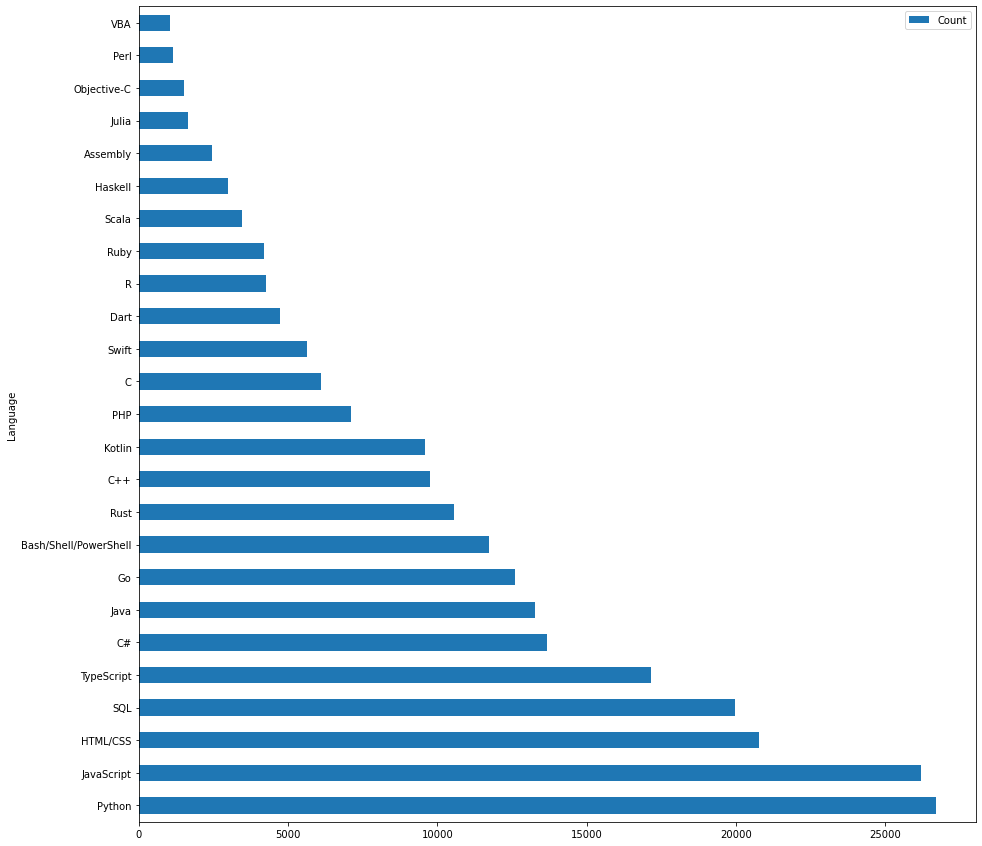

In [24]:
df_lan_2020 = df_2020[['LanguageDesireNextYear']].dropna()
df_lan_2020 = pd.DataFrame(df_lan_2020.LanguageDesireNextYear.str.split(';').explode('LanguageDesireNextYear').reset_index(drop=True))
df_lan_2020 = pd.DataFrame(df_lan_2020['LanguageDesireNextYear'].value_counts().rename('Count').reset_index())
df_lan_2020.rename(columns={'index': 'Language'}, inplace = True)

df_lan_2020.plot.barh(x='Language',figsize=(15,15))
plt.show()

Count and visual representation of the developers' occupations in 2015:

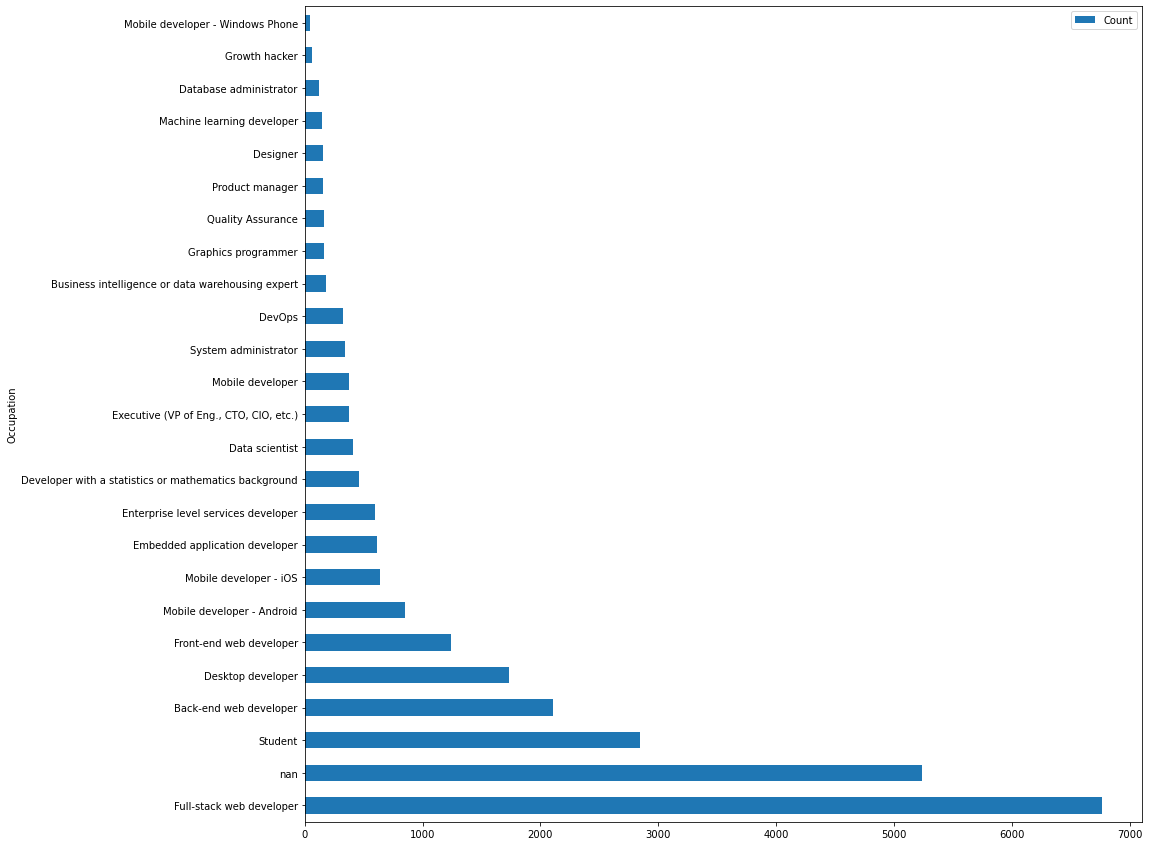

In [25]:
df_lan_2015 = df_2015[['Occupation']].dropna()
df_lan_2015 = pd.DataFrame(df_lan_2015['Occupation'].value_counts().rename('Count').reset_index())
df_lan_2015.rename(columns={'index': 'Occupation'}, inplace = True)

df_lan_2015.plot.barh(x='Occupation',figsize=(15,15))
plt.show()

Count and visual representation of the developers' occupations in 2020:

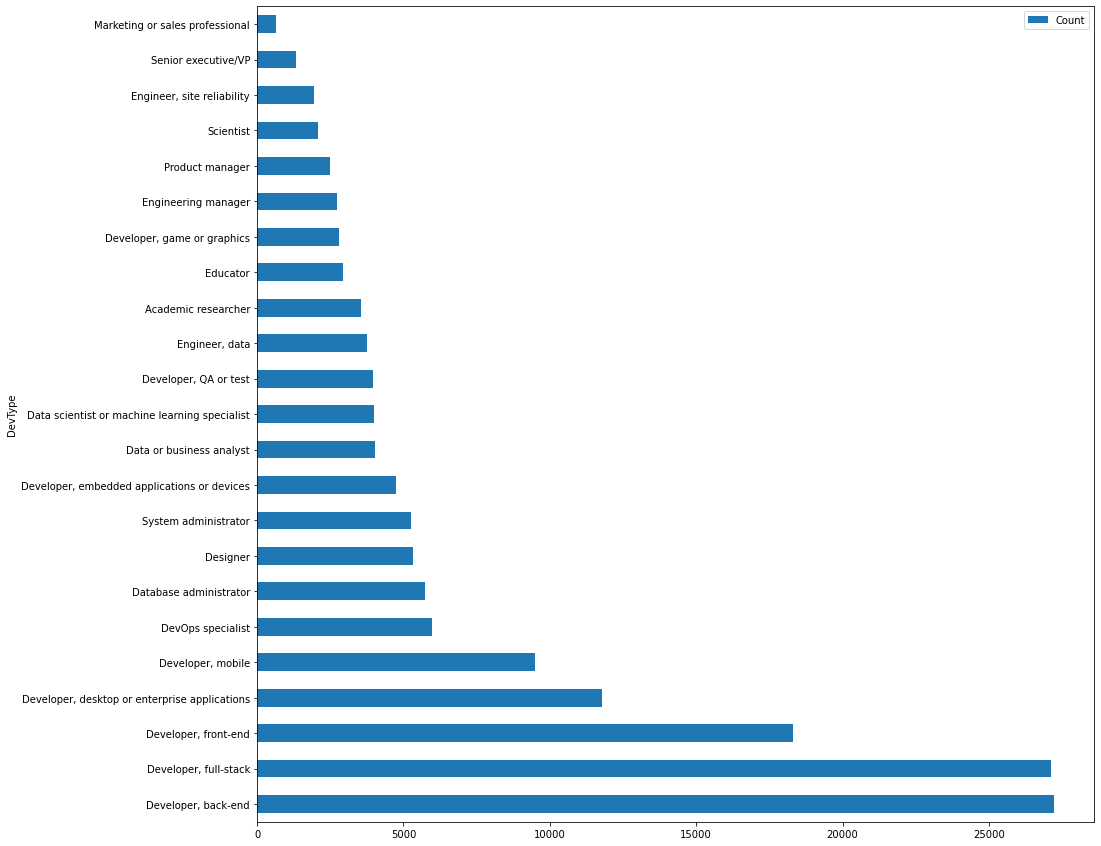

In [26]:
df_lan_2020 = df_2020[['DevType']].dropna()
df_lan_2020 = pd.DataFrame(df_lan_2020.DevType.str.split(';').explode('DevType').reset_index(drop=True))
df_lan_2020 = pd.DataFrame(df_lan_2020['DevType'].value_counts().rename('Count').reset_index())
df_lan_2020.rename(columns={'index': 'DevType'}, inplace = True)

df_lan_2020.plot.barh(x='DevType',figsize=(15,15))
plt.show()

Computation of the percentage of respondents having no computer science background by counting the rows with all three fields related to computer science education left blank (NaN):

In [27]:
df_educ_2015 = pd.DataFrame(df_2015[['Training & Education: BS in CS','Training & Education: Masters in CS', 'Training & Education: PhD in CS']].isna().sum(axis=1).rename('Count'))
df_educ_2015[df_educ_2015.Count == 3].count()/df_2015.shape[0]

Count    0.575289
dtype: float64

Count and visual representation of the developers' education backgrounds in 2020:

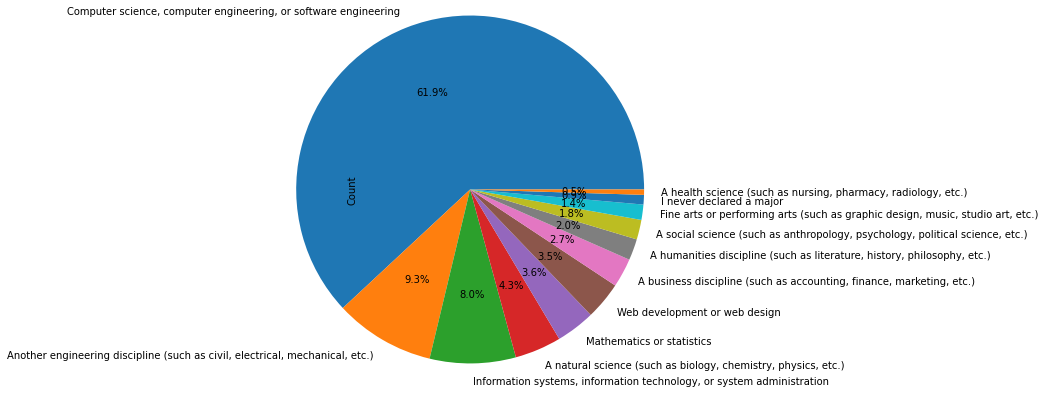

In [29]:
df_educ_2020 = pd.DataFrame(df_2020['UndergradMajor'].value_counts().rename('Count').reset_index())
df_educ_2020.rename(columns={'index': 'Major'}, inplace = True)

df_educ_2020.plot.pie(y='Count', labels=df_educ_2020['Major'], legend = False, autopct='%1.1f%%', radius = 2)
plt.show()

Count and visual representation of the developers' satisfaction in 2015:

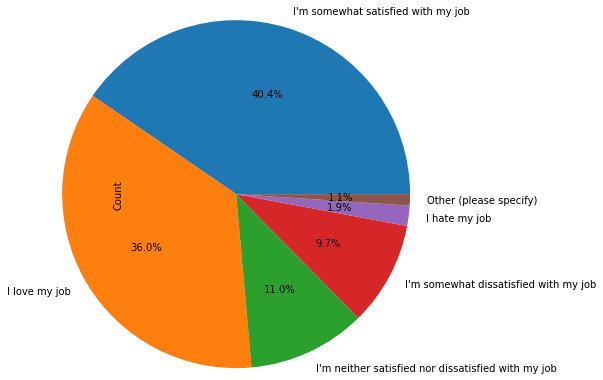

In [30]:
df_satisf_2015 = df_2015[['Job Satisfaction']].dropna()
df_satisf_2015 = pd.DataFrame(df_satisf_2015['Job Satisfaction'].value_counts().rename('Count').reset_index())
df_satisf_2015.rename(columns={'index': 'Job Satisfaction'}, inplace = True)

df_satisf_2015.plot.pie(y='Count', labels=df_satisf_2015['Job Satisfaction'], legend = False, autopct='%1.1f%%', radius = 2)
plt.show()

Count and visual representation of the developers' satisfaction in 2020:

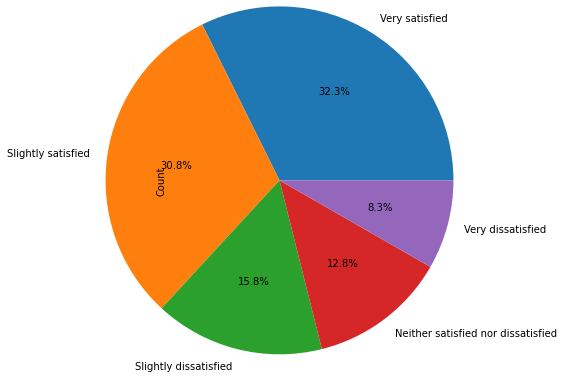

In [31]:
df_satisf_2020 = df_2020[['JobSat']].dropna()
df_satisf_2020 = pd.DataFrame(df_satisf_2020['JobSat'].value_counts().rename('Count').reset_index())
df_satisf_2020.rename(columns={'index': 'Job Satisfaction'}, inplace = True)

df_satisf_2020.plot.pie(y='Count', labels=df_satisf_2020['Job Satisfaction'], legend = False, autopct='%1.1f%%', radius = 2)
plt.show()